# Pistachio Classification

<img src="https://www.makbul.com/Content/global/images/products/1/131/ORG-antep-fistigi-kg886.jpg">

Bu projemizde antep fıstıklarını CNN ve Transfer Learning(ResNet50) kullanrak sınıflandıracağız

<a href="https://www.muratkoklu.com/datasets/">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import cv2 
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
img_path="Pistachio_Image_Dataset/"
labels=os.listdir("Pistachio_Image_Dataset")

In [3]:
labels

['Kirmizi_Pistachio', 'Siirt_Pistachio']

In [4]:
# Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+"/"+img_file)
        label_list.append(label)

In [5]:
df=pd.DataFrame({"img":img_list,"label":label_list})

In [6]:
df.sample(5)

,img,label
1313,Pistachio_Image_Dataset/Siirt_Pistachio/siirt ...,Siirt_Pistachio
1019,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio
1185,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio
686,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio
1997,Pistachio_Image_Dataset/Siirt_Pistachio/siirt ...,Siirt_Pistachio


In [7]:
d={"Kirmizi_Pistachio":0,"Siirt_Pistachio":1}

In [8]:
df["encode_label"]=df["label"].map(d)

In [9]:
df.sample(5)

,img,label,encode_label
434,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio,0
444,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio,0
344,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio,0
913,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio,0
575,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio,0


In [10]:
x=[]
for img in df["img"]:
    img=cv2.imread(img)
    img=cv2.resize(img,(96,96))
    img=img/255
    x.append(img)
    

In [11]:
x=np.array(x)

In [12]:
y=df["encode_label"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [15]:
model=Sequential()
model.add(Input(shape=(96,96,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))  # Görüntüden özellikleri çıkartır.
model.add(MaxPooling2D(pool_size=(2,2)))   # Özellikleri özetler ve boyutu küçültür.
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())  # Girdiyi Tek Boyutlu bir diziye dönüştürür
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dense(2,activation="softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,verbose=1)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.7500 - loss: 2.9853 - val_accuracy: 0.5674 - val_loss: 7.2367
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8365 - loss: 1.4527 - val_accuracy: 0.5674 - val_loss: 4.3931
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8495 - loss: 0.5584 - val_accuracy: 0.5674 - val_loss: 2.2331
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.8617 - loss: 0.3620 - val_accuracy: 0.5698 - val_loss: 1.3023
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8747 - loss: 0.2988 - val_accuracy: 0.6023 - val_loss: 0.7624
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8873 - loss: 0.2680 - val_accuracy: 0.8512 - val_loss: 0.3622
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8845 - loss: 0.2881 - val_accuracy: 0.8581 - val_loss: 0.3486
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8973 - loss: 0.2525 - val_accuracy: 0.8395 - v

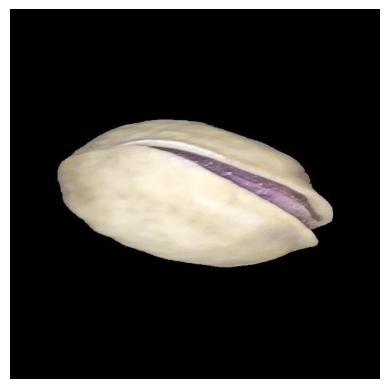

In [46]:
image_path = "Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (10).jpg"  # Görüntü dosyasının yolu
img = cv2.imread(image_path)  # Görüntüyü yükleme
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler; RGB'ye dönüştürelim
plt.imshow(img)# Görüntüyü gösterme
plt.axis('off')  # Eksenleri gizleme
plt.show()

In [47]:
def oz_çık(img):
    img=cv2.imread(img)
    img=cv2.resize(img,(96,96))
    img=img/255
    img=np.expand_dims(img,axis=0) # Modelin boyutunu arttırıyor
    return img

In [48]:
image=oz_çık("Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (10).jpg")

In [49]:
prediction=model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [52]:
predicted_class=np.argmax(prediction)

In [53]:
predicted_class

0

In [54]:
#{"Kirmizi_Pistachio":0,"Siirt_Pistachio":1}

In [55]:
model.save("fistik.h5")

# ResNet50 ile

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Tek satırda resimlerin tamamını okumaya yarıyor

In [2]:
data_dir="Pistachio_Image_Dataset"
img_width,img_height=224,224

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="binary", subset="training")

test_datagen=ImageDataGenerator( rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="binary", subset="validation")

base_model=ResNet50(weights="imagenet", input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation="relu")) # Dense nöronları birbirine bağlar
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.
Epoch 1/10


C:\Users\erkan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5908 - loss: 8.6294 - val_accuracy: 0.8182 - val_loss: 0.4362
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8130 - loss: 0.4001 - val_accuracy: 0.8368 - val_loss: 0.3718
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8651 - loss: 0.3318 - val_accuracy: 0.8695 - val_loss: 0.3185
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8739 - loss: 0.3001 - val_accuracy: 0.8601 - val_loss: 0.3227
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8852 - loss: 0.2837 - val_accuracy: 0.8648 - val_loss: 0.3255
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8937 - loss: 0.2492 - val_accuracy: 0.8159 - val_loss: 0.4264
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8840 - loss: 0.2578 - val_accuracy: 0.8695 - val_loss: 0.2977
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8993 - loss: 0.2585 - val_accuracy: 0.6876 - val_loss: 0.6898
Epo

In [63]:
model.save("fistik_2.h5")

Sonuc olarak İlk modelimizde 94% İkinci modelimizde 88% accuracy elde ettik.